## LINEAR REGRESSION SINGLE FEATURE - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('./dataset/housing.csv')
data.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


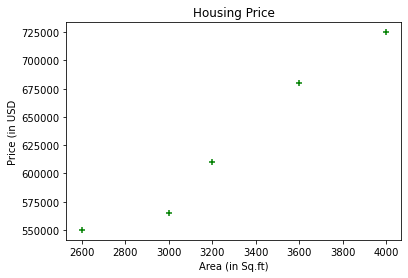

In [3]:
plt.scatter(data['area'], data['price'], c='green', marker='+')
plt.xlabel("Area (in Sq.ft)")
plt.ylabel("Price (in USD")
plt.title("Housing Price")
plt.show()

In [4]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(data[['area']], data['price']) 

LinearRegression()

In [5]:
print(linear_reg_model.intercept_)
print(linear_reg_model.coef_)

180616.43835616432
[135.78767123]


In [8]:
linear_reg_model.predict([[2700]])

array([547243.15068493])

In [9]:
areas = pd.read_csv('./dataset/area.csv')
areas.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [12]:
predicted_prices = linear_reg_model.predict(areas[['area']]) 
predicted_prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
areas['predicted_price'] = predicted_prices
areas.to_csv('./dataset/area_prediction.csv',index=False)

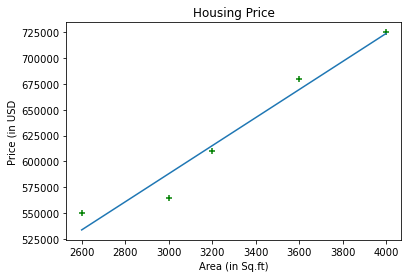

In [19]:
plt.scatter(data['area'], data['price'], c='green', marker='+')
plt.xlabel("Area (in Sq.ft)")
plt.ylabel("Price (in USD")
plt.title("Housing Price")
plt.plot(data['area'], linear_reg_model.predict(data[['area']]),label='Regression Line')
plt.show()

## LINEAR REGRESSION SINGLE FEATURE - 2

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
data = pd.read_csv('./dataset/canada_per_capita_income.csv')
data.head()

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


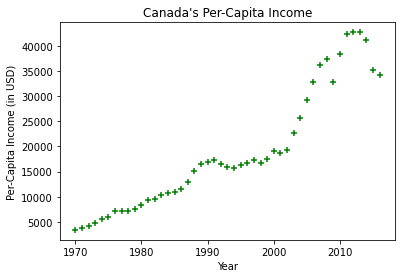

In [22]:
plt.scatter(data['year'], data['per_capita_income'], c='green', marker='+')
plt.xlabel('Year')
plt.ylabel('Per-Capita Income (in USD)')
plt.title("Canada's Per-Capita Income")
plt.show()

In [23]:
model = LinearRegression()
model.fit(data[['year']], data['per_capita_income'])

print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [828.46507522]
Intercept:  -1632210.7578554575


In [24]:
years = pd.read_csv('./dataset/years.csv')
years.head()

,year
0,2017
1,2018
2,2019
3,2020
4,2021


In [30]:
years['PCI_prediction'] = model.predict(years[['year']])
years.head()

,year,PCI_prediction
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170


In [29]:
years.to_csv('./dataset/years_prediction.csv')

## LINEAR REGRESSION MULTIPLE FEATURES - 1

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [32]:
data = pd.read_csv('./dataset/housing_2.csv')
data.head(10)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [33]:
median_bedrooms = math.floor(data['bedrooms'].median())
data['bedrooms'] = data['bedrooms'].fillna(median_bedrooms)
data.head(10)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [34]:
X = data.iloc[:,0:3].values
Y = data.iloc[:,-1].values

In [35]:
model = LinearRegression()
model.fit(X,Y)

print("Coeffecients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coeffecients:  [  112.06244194 23388.88007794 -3231.71790863]
Intercept:  221323.0018654043


In [36]:
print(model.predict([[3000, 3, 40]]))
print(model.predict([[2500, 4, 5]]))

[498408.25158031]
[578876.03748933]


## LINEAR REGRESSION MULTIPLE FEATURES - 2

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
interview_data = pd.read_csv('./dataset/interview.csv')
interview_data

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [47]:
interview_data['experience'] = interview_data['experience'].fillna(0)
interview_data['test_score'] = interview_data['test_score'].fillna(math.floor(interview_data['test_score'].mean()))
interview_data

,experience,test_score,interview_score,salary
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


In [51]:
X = interview_data.iloc[:,0:3].values
Y = interview_data.iloc[:,-1].values

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [53]:
# 2 years experience, 9 marks in test and 6 marks in interview
# 12 years experience, 10 marks in test and 10 marks in interview

model.predict([[2, 9, 6],[12, 10, 10]])

array([53713.86677124, 93747.79628651])